# EXPLAINABILITY

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('cleaned.csv',sep=',')

# Separate features and target
# Assuming the first 6 columns are actions
X = data.iloc[:, 6:]
y = data.iloc[:, :6]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## DT

In [4]:
# Train Decision Tree for multi-output regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Regression Report:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regression Report:
MSE: 3.3692938903208486e-07


Feature Importances:
                feature  importance
10       State_V_low_L1    0.486904
7    State_AAPL_open_L1    0.117157
21   State_BABA_high_L1    0.091647
12   State_SNE_close_L1    0.076131
23   State_BABA_open_L1    0.058014
4   State_AAPL_close_L1    0.043887
16  State_ADBE_close_L1    0.020843
14     State_SNE_low_L1    0.020484
20  State_BABA_close_L1    0.019400
18    State_ADBE_low_L1    0.017443
22    State_BABA_low_L1    0.010614
15    State_SNE_open_L1    0.010260
9       State_V_high_L1    0.008775
11      State_V_open_L1    0.006805
8      State_V_close_L1    0.006019
17   State_ADBE_high_L1    0.004899
13    State_SNE_high_L1    0.000328
5    State_AAPL_high_L1    0.000227
19   State_ADBE_open_L1    0.000116
6     State_AAPL_low_L1    0.000048
1    State_Cash_high_L1    0.000000
2     State_Cash_low_L1    0.000000
3    State_Cash_open_L1    0.000000
0   State_Cash_close_L1    0.000000


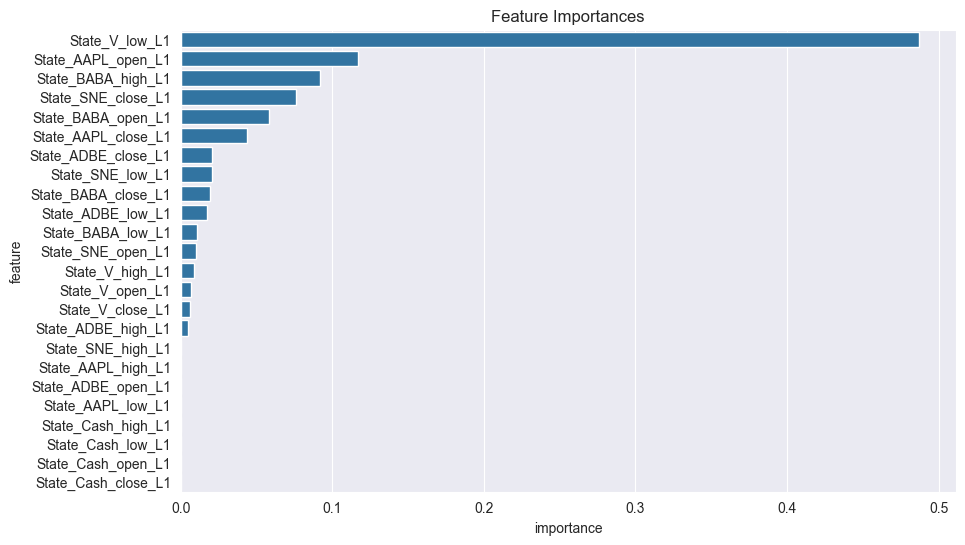

In [5]:

# Feature Importances
importances = dt_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


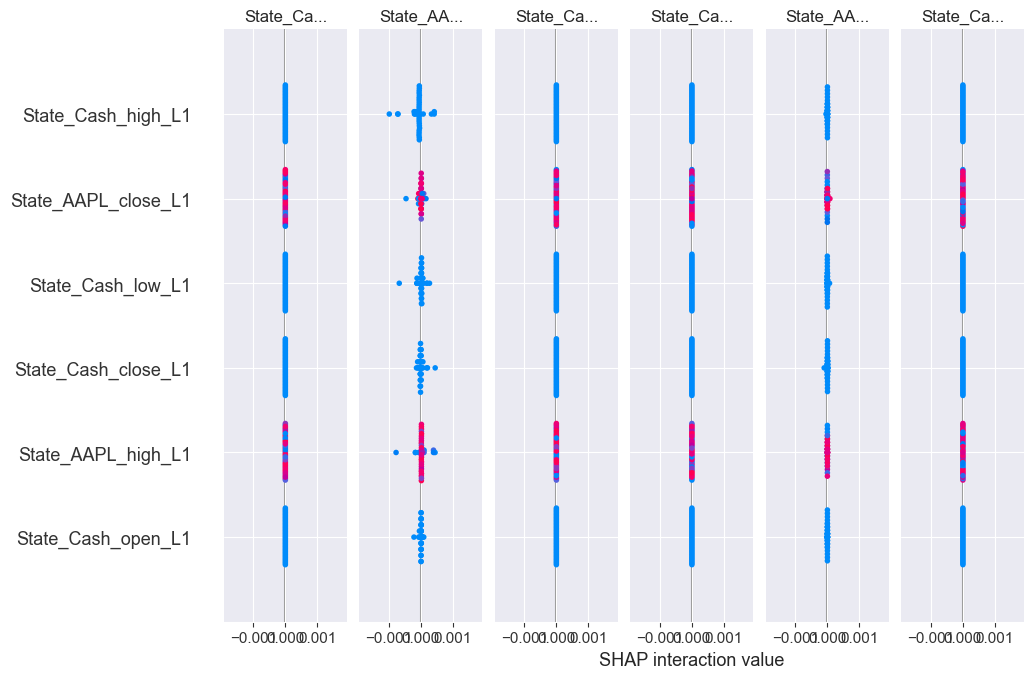

In [7]:

# SHAP for multi-output regression
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")


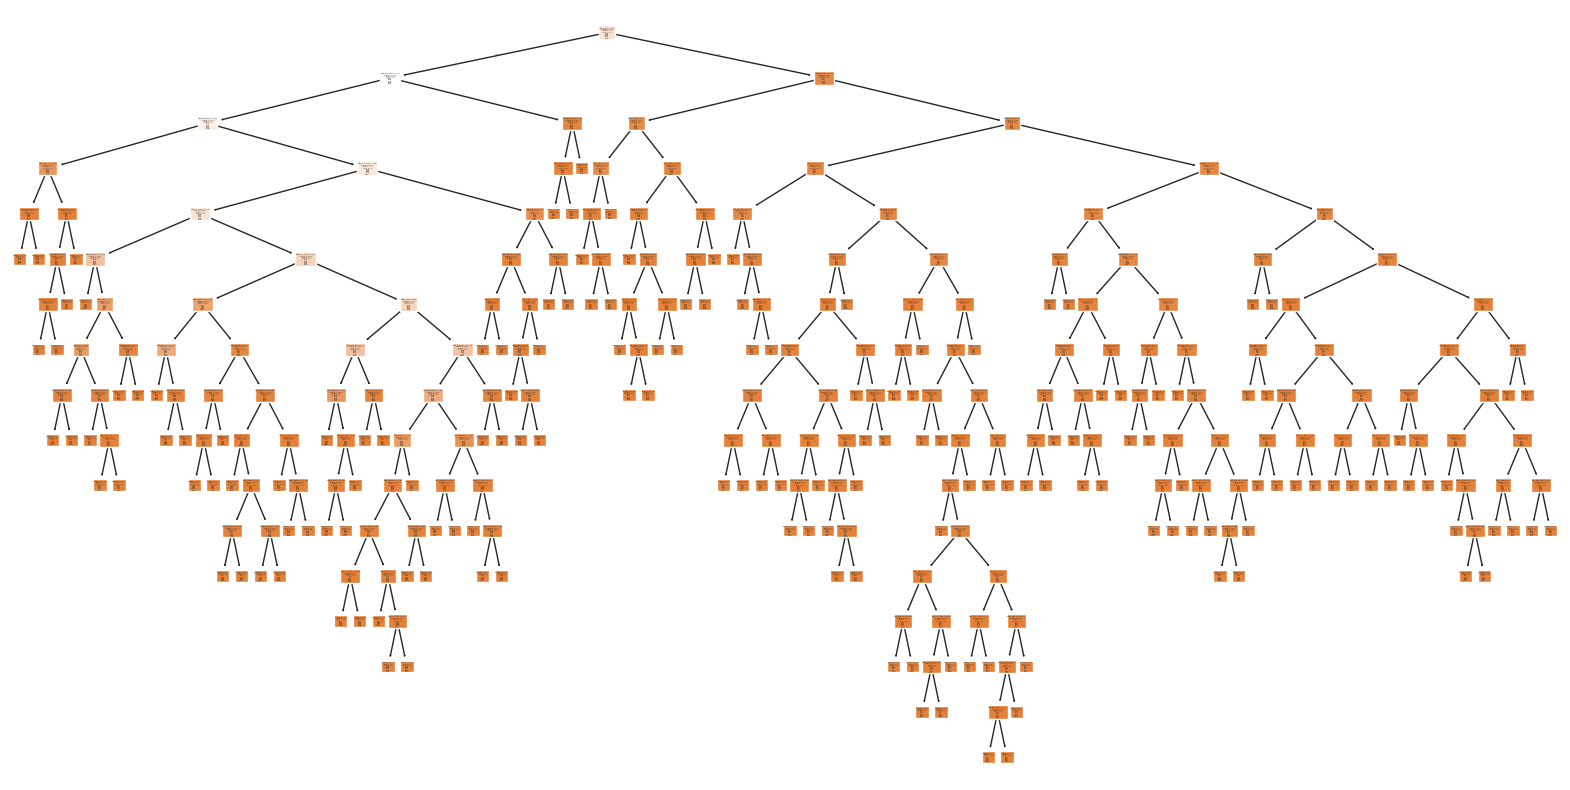

In [8]:
# Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.show()


## RF

In [36]:

# # Save the SHAP values
# shap_values_df = pd.DataFrame(shap_values, columns=X.columns)
# shap_values_df.to_csv('shap_values_dt.csv', index=False)

# # Save the feature importances
# feature_importances.to_csv('feature_importances_dt.csv', index=False)


In [9]:
# Train Random Forest for multi-output regression
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Regression Report:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regression Report:
MSE: 1.0785733519570084e-07


Feature Importances:
                feature  importance
6     State_AAPL_low_L1    0.149159
10       State_V_low_L1    0.108498
5    State_AAPL_high_L1    0.080744
11      State_V_open_L1    0.060742
4   State_AAPL_close_L1    0.059734
20  State_BABA_close_L1    0.058568
12   State_SNE_close_L1    0.056400
7    State_AAPL_open_L1    0.053902
18    State_ADBE_low_L1    0.050498
14     State_SNE_low_L1    0.047841
22    State_BABA_low_L1    0.046187
8      State_V_close_L1    0.040560
9       State_V_high_L1    0.029656
16  State_ADBE_close_L1    0.027853
15    State_SNE_open_L1    0.027722
23   State_BABA_open_L1    0.027151
21   State_BABA_high_L1    0.026471
17   State_ADBE_high_L1    0.017938
13    State_SNE_high_L1    0.015520
19   State_ADBE_open_L1    0.014856
1    State_Cash_high_L1    0.000000
3    State_Cash_open_L1    0.000000
2     State_Cash_low_L1    0.000000
0   State_Cash_close_L1    0.000000


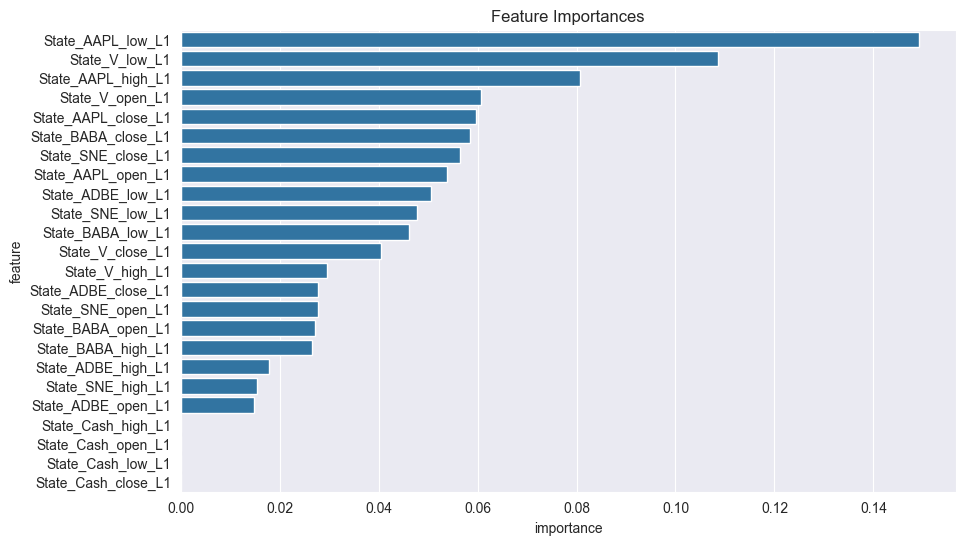

In [10]:

# Feature Importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()



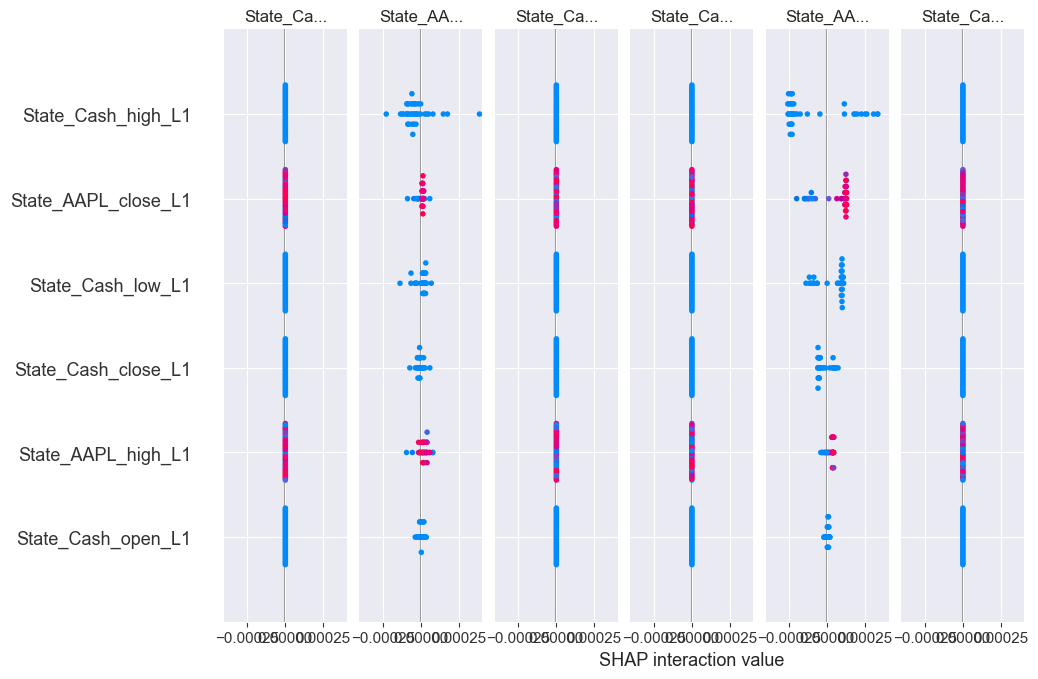

In [11]:

# SHAP for multi-output regression
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')



In [40]:

# Save the SHAP values
# shap_values_df = pd.DataFrame(shap_values, columns=X.columns)
# shap_values_df.to_csv('shap_values_rf.csv', index=False)

# # Save the feature importances
# feature_importances.to_csv('feature_importances_rf.csv', index=False)

In [12]:
# Improve the model
# Tune the hyperparameters of the Random Forest model
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print("Best Random Forest Regression Report:")
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters:
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Regression Report:
MSE: 1.32728781260468e-07


Feature Importances:
                feature  importance
10       State_V_low_L1    0.162820
6     State_AAPL_low_L1    0.152695
5    State_AAPL_high_L1    0.086890
14     State_SNE_low_L1    0.055456
7    State_AAPL_open_L1    0.055163
4   State_AAPL_close_L1    0.049975
20  State_BABA_close_L1    0.049955
12   State_SNE_close_L1    0.048188
22    State_BABA_low_L1    0.040502
23   State_BABA_open_L1    0.036161
9       State_V_high_L1    0.035568
13    State_SNE_high_L1    0.033297
8      State_V_close_L1    0.031814
11      State_V_open_L1    0.030422
21   State_BABA_high_L1    0.028115
16  State_ADBE_close_L1    0.026286
15    State_SNE_open_L1    0.025221
18    State_ADBE_low_L1    0.019038
17   State_ADBE_high_L1    0.017152
19   State_ADBE_open_L1    0.015283
1    State_Cash_high_L1    0.000000
3    State_Cash_open_L1    0.000000
2     State_Cash_low_L1    0.000000
0   State_Cash_close_L1    0.000000


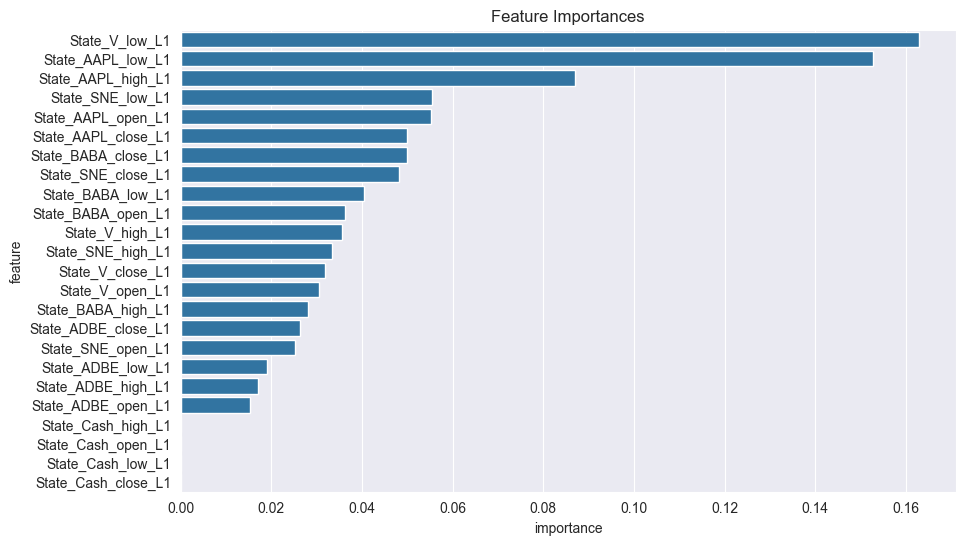

In [13]:
# Feature Importances
importances = best_rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

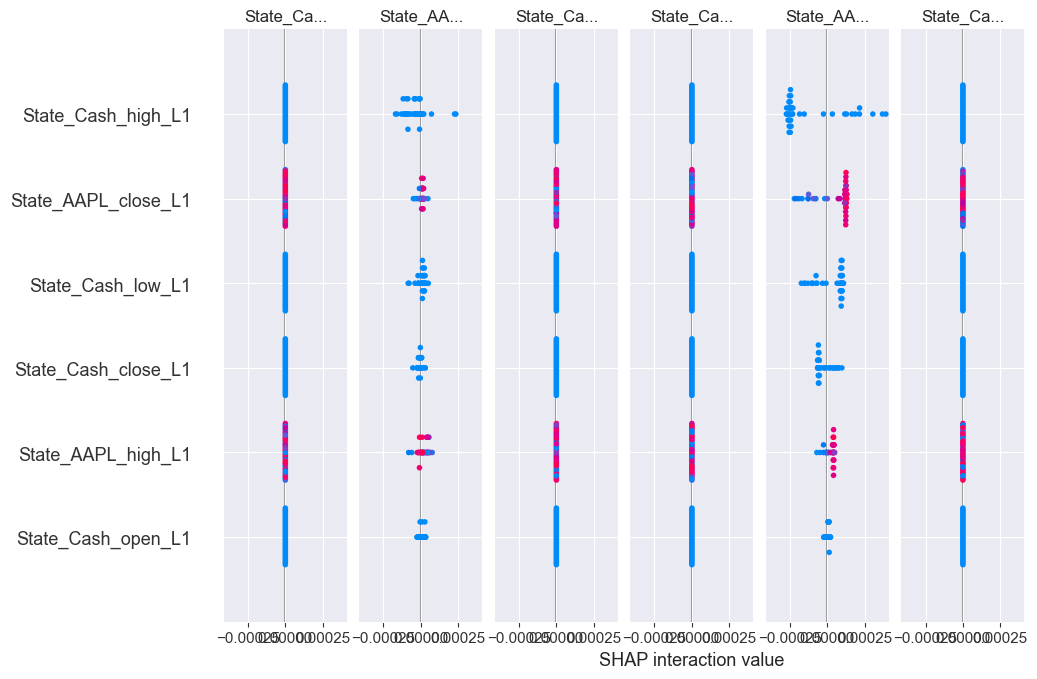

In [14]:
# SHAP for multi-output regression
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for all the columns in X
shap.summary_plot(shap_values, X_test, plot_type='bar')



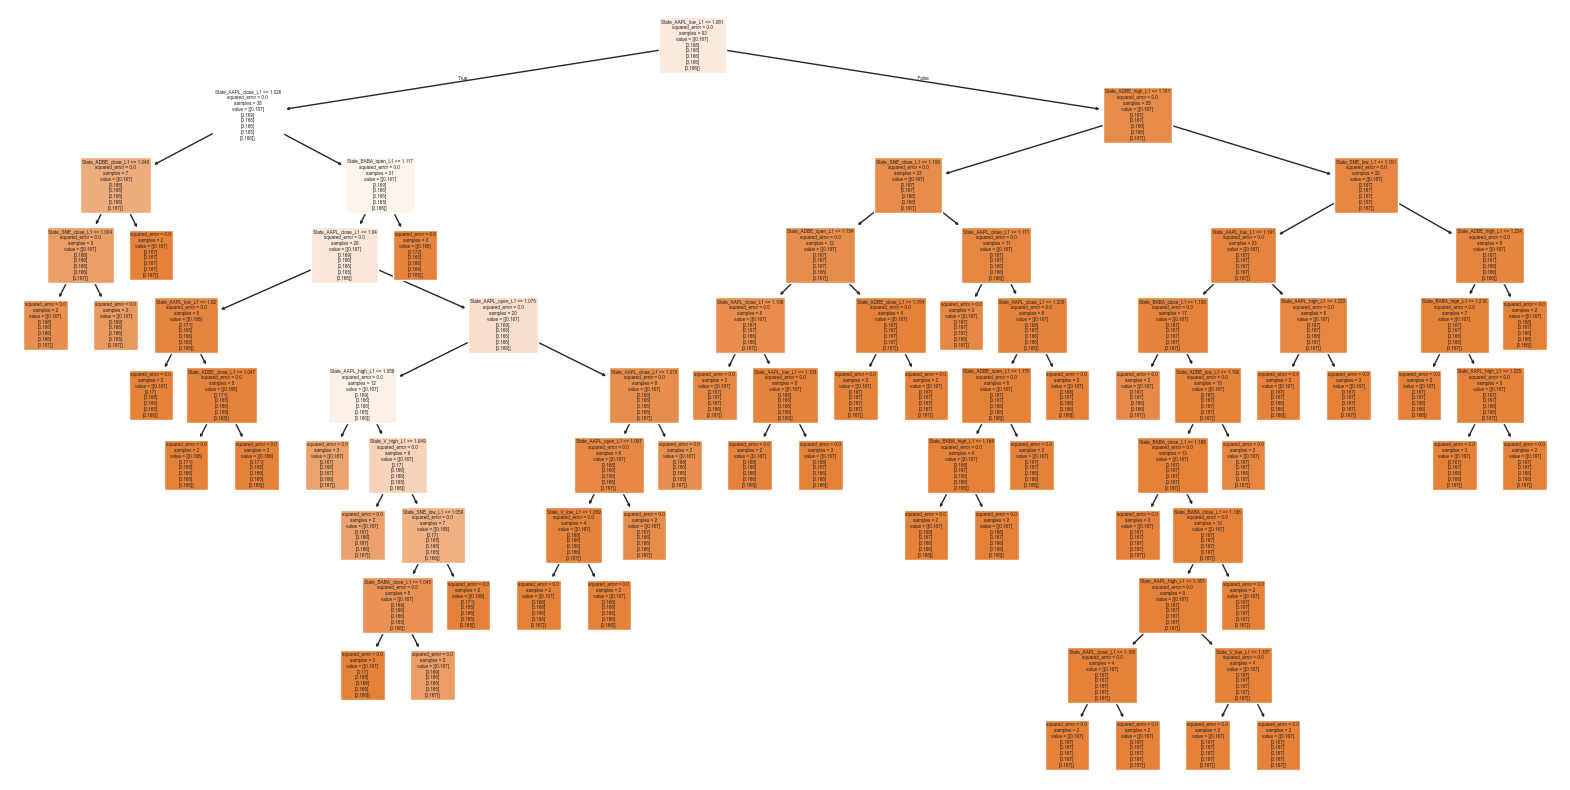

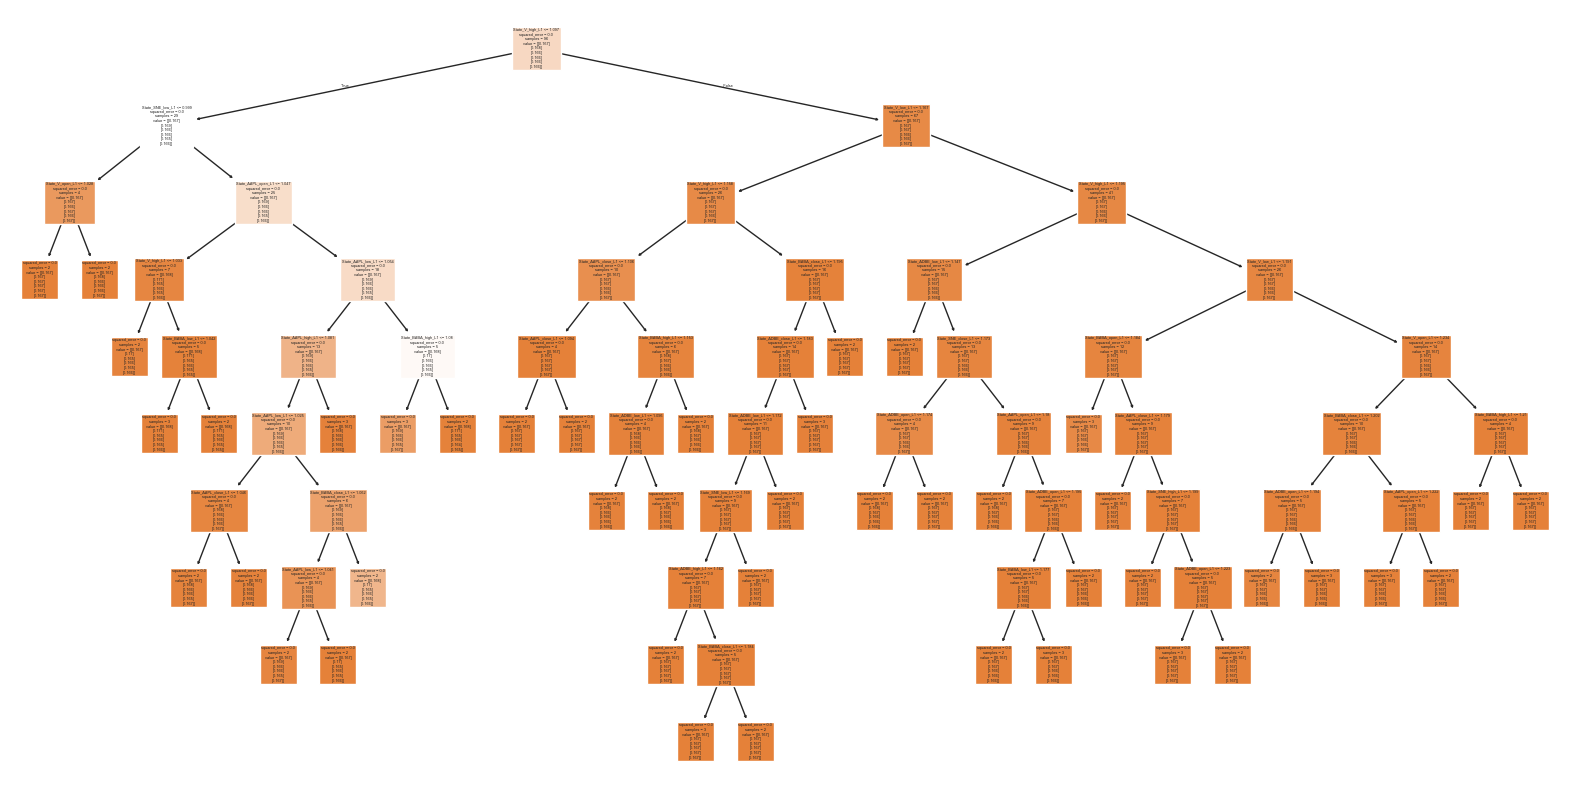

In [15]:
# Plot the Random Forest
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[1], filled=True, feature_names=X.columns)
plt.show()


## ILP

In [16]:
from pyswip import Prolog


In [17]:

prolog = Prolog()

# load data
state_actions=pd.read_csv('cleaned_state_action_recopilation.csv')
state_actions.head()





FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_state_action_recopilation.csv'

## EXTRA

In [57]:
# Linear Model U-Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define the Linear Model U-Tree
class LinearModelUTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        self.models = []
        for i in range(y.shape[1]):
            model = make_pipeline(PolynomialFeatures(2), LinearRegression())
            model.fit(X, y.iloc[:, i])
            self.models.append(model)

    def predict(self, X):
        y_pred = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            y_pred[:, i] = model.predict(X)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)
    
    def get_params(self, deep=True):
        return {'max_depth': self.max_depth}

    def set_params(self, **params):
        self.max_depth = params['max_depth']
        return self

# Train the Linear Model U-Tree
lmu_tree = LinearModelUTree()
lmu_tree.fit(X_train, y_train)
y_pred_lmu_tree = lmu_tree.predict(X_test)
print("Linear Model U-Tree Report:")
print("MSE:", mean_squared_error(y_test, y_pred_lmu_tree))



Linear Model U-Tree Report:
MSE: 0.06561503650315452


In [58]:
# Improve the Linear Model U-Tree
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {
    'max_depth': [1, 2, 3, 4, 5]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=lmu_tree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_lmu_tree = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_lmu_tree = best_lmu_tree.predict(X_test)
print("Best Linear Model U-Tree Report:")
print("MSE:", mean_squared_error(y_test, y_pred_best_lmu_tree))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters:
{'max_depth': 1}
Best Linear Model U-Tree Report:
MSE: 0.06561503650315452


In [63]:
# LIME model explanation
from lime import lime_tabular

# Define the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, mode='regression')

# Explain the Linear Model U-Tree
i = 0
exp = explainer.explain_instance(X_test.values[i], best_lmu_tree.predict, num_features=5)
exp.show_in_notebook(show_table=True)


c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ale\anacond

In [64]:

# Explain the Random Forest
i = 0
exp = explainer.explain_instance(X_test.values[i], best_rf_model.predict, num_features=5)
exp.show_in_notebook(show_table=True)


c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:

# Explain the Decision Tree
i = 0
exp = explainer.explain_instance(X_test.values[i], dt_model.predict, num_features=5)
exp.show_in_notebook(show_table=True)




c:\Users\Ale\anaconda3\envs\business\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lime import lime_tabular
import json

# Load the states and actions from the CSV file
data = pd.read_csv('cleaned_state_action_recopilation.csv')

# Assuming 'State' and 'Action' columns are present in the CSV file
states = data.iloc[:, 6:]
actions = data.iloc[:, :6]


In [7]:
states

State1.1  State1.2  State1.3  State2.1  State2.2  State2.3  State3.1  \
0         1.0       1.0       1.0  0.943274  0.951649  0.948023  0.690821   
1         1.0       1.0       1.0  0.951649  0.948023  0.922293  0.685673   
2         1.0       1.0       1.0  0.948023  0.922293  0.915127  0.679845   
3         1.0       1.0       1.0  0.922293  0.915127  0.938698  0.682759   
4         1.0       1.0       1.0  0.915127  0.938698  0.945864  0.696746   
..        ...       ...       ...       ...       ...       ...       ...   
489       1.0       1.0       1.0  1.001295  1.007080  1.009757  1.005828   
490       1.0       1.0       1.0  1.007080  1.009757  1.010706  1.022729   
491       1.0       1.0       1.0  1.009757  1.010706  1.004058  1.027392   
492       1.0       1.0       1.0  1.010706  1.004058  1.006044  1.024866   
493       1.0       1.0       1.0  1.004058  1.006044  1.012433  1.017193   

     State3.2  State3.3  State4.1  State4.2  State4.3  State5.1  State5.2  \
0    0.685673  0.679845  1.157271  1.147591  1.134039  0.762041  0.755619   
1    0.679845  0.682759  1.147591  1.134039  1.096800  0.755619  0.738494   
2    0.682759  0.696746  1.134039  1.096800  1.103405  0.738494  0.746700   
3    0.696746  0.694415  1.096800  1.103405  1.139278  0.746700  0.737424   
4    0.694415  0.694900  1.103405  1.139278  1.176290  0.737424  0.742776   
..        ...       ...       ...       ...       ...       ...       ...   
489  1.022729  1.027392  1.009794  1.012755  1.023118  1.014627  1.028898   
490  1.027392  1.024866  1.012755  1.023118  1.016399  1.028898  1.025330   
491  1.024866  1.017193  1.023118  1.016399  0.988498  1.025330  1.016411   
492  1.017193  1.020107  1.016399  0.988498  0.988384  1.016411  1.011416   
493  1.020107  1.019718  0.988498  0.988384  0.996925  1.011416  1.015341   

     State5.3  State6.1  State6.2  State6.3  
0    0.738494  0.833120  0.835555  0.818893  
1    0.746700  0.835555  0.818893  0.811074  
2    0.737424  0.818893  0.811074  0.816970  
3    0.742776  0.811074  0.816970  0.822994  
4    0.781663  0.816970  0.822994  0.824404  
..        ...       ...       ...       ...  
489  1.025330  1.004230  1.001025  1.004358  
490  1.016411  1.001025  1.004358  1.001538  
491  1.011416  1.004358  1.001538  0.998462  
492  1.015341  1.001538  0.998462  1.001666  
493  1.012487  0.998462  1.001666  1.004230  

[494 rows x 18 columns]

In [12]:

# Convert states and actions to numpy arrays
states = np.array(states.values.tolist())
actions = np.array(actions.values.tolist())


In [9]:
# Define the mock function to predict the actions


array([[1.        , 1.        , 1.        , ..., 0.83311971, 0.83555499,
        0.8188925 ],
       [1.        , 1.        , 1.        , ..., 0.83555499, 0.81889259,
        0.811074  ],
       [1.        , 1.        , 1.        , ..., 0.81889259, 0.81107408,
        0.81697   ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.00435786, 1.00153807,
        0.9984619 ],
       [1.        , 1.        , 1.        , ..., 1.00153807, 0.99846193,
        1.0016662 ],
       [1.        , 1.        , 1.        , ..., 0.99846193, 1.00166624,
        1.0042296 ]])

In [14]:
# Use the LIME explainer to explain the model's predictions
explainer = lime_tabular.LimeTabularExplainer(states, feature_names=states.columns, mode='regression')

# Explain the model's predictions
i = 0
exp = explainer.explain_instance(states[i], predict_actions, num_features=5)
exp.show_in_notebook(show_table=True)



ValueError: Found input variables with inconsistent numbers of samples: [5000, 494]